In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.style import use
import seaborn as sns
%matplotlib inline

In [2]:
movies = pd.read_csv(r'movies.dat', sep = "::", names = ['MovieID','Title','Genres'], engine = 'python')

In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv(r'ratings.dat', sep = "::", names = ['UserID','MovieID','Rating','Timestamp'], engine = 'python')

In [5]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users = pd.read_csv(r'users.dat', sep = "::", names = ['UserID','Gender','Age','Occupation','Zip-Code'], engine = 'python')

In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
movies.shape

(3883, 3)

In [9]:
ratings.shape

(1000209, 4)

In [10]:
users.shape

(6040, 5)

In [11]:
movie_ratings = pd.merge(movies, ratings, on = 'MovieID')

In [12]:
movie_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [13]:
movie_ratings.shape

(1000209, 6)

In [14]:
movie_ratings_users = pd.merge(movie_ratings, users, on = 'UserID')

In [15]:
movie_ratings_users.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [16]:
movie_ratings_users.shape

(1000209, 10)

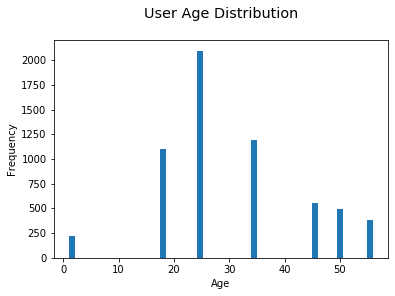

In [17]:
users.Age.plot.hist(bins=50)
plt.style.use('ggplot')
plt.title('User Age Distribution\n')
plt.xlabel('Age')
plt.show()

In [18]:
user_rating_toy_story = movie_ratings_users.loc[movie_ratings_users["MovieID"]==1]

In [19]:
user_rating_toy_story.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [20]:
movie_ratings_users.Rating[movie_ratings_users["MovieID"]==1].mean()

4.146846413095811

In [21]:
user_rating_toy_story['Rating'].mean()

4.146846413095811

In [22]:
data_count = movie_ratings_users['Title'].value_counts()
data_count[0:25]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [23]:
titlewise_rating = pd.DataFrame(movie_ratings_users.groupby('Title')['Rating'].mean())

In [24]:
titlewise_rating.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [25]:
 top_25 =  titlewise_rating.sort_values('Rating', ascending= False).head(25)

In [26]:
top_25

,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [27]:
user_id_2696 = movie_ratings_users[movie_ratings_users["UserID"]==2696]

In [28]:
user_id_2696.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210


In [29]:
user_id_2696["Rating"].head()

991035    3
991036    5
991037    4
991038    3
991039    4
Name: Rating, dtype: int64

In [30]:
movie_ratings_users['Genres'].head(6)

0             Animation|Children's|Comedy
1    Animation|Children's|Musical|Romance
2                                   Drama
3         Action|Adventure|Fantasy|Sci-Fi
4                               Drama|War
5                        Children's|Drama
Name: Genres, dtype: object

In [31]:
movie_ratings_users.Genres = movie_ratings_users["Genres"].str.split("|")


In [32]:
movie_ratings_users.Genres.head()

0              [Animation, Children's, Comedy]
1    [Animation, Children's, Musical, Romance]
2                                      [Drama]
3         [Action, Adventure, Fantasy, Sci-Fi]
4                                 [Drama, War]
Name: Genres, dtype: object

In [33]:
data5k = movie_ratings_users[:5000] 

In [34]:
x = []
for rn in range(len(data5k)):
    x = x + data5k.Genres[rn]
        
print(x)

['Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Musical', 'Romance', 'Drama', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Drama', 'War', "Children's", 'Drama', 'Animation', "Children's", 'Comedy', 'Musical', 'Animation', "Children's", 'Musical', 'Animation', "Children's", 'Musical', 'Crime', 'Drama', 'Thriller', 'Animation', "Children's", 'Musical', 'Animation', 'Animation', 'Comedy', 'Thriller', 'Animation', "Children's", 'Musical', 'Musical', 'Romance', 'Adventure', "Children's", 'Drama', 'Musical', 'Musical', 'Animation', "Children's", 'Musical', "Children's", 'Comedy', 'Musical', 'Animation', "Children's", 'Musical', 'Musical', "Children's", 'Drama', 'Fantasy', 'Sci-Fi', 'Drama', 'Action', 'Adventure', 'Comedy', 'Romance', 'Drama', 'Drama', 'Comedy', 'Sci-Fi', 'Action', 'Adventure', 'Drama', 'Drama', 'Adventure', 'Animation', "Children's", 'Comedy', 'Musical', 'Drama', 'Romance', 'Drama', 'Animation', "Children's", 'Drama', 'Drama', 'Animation', "Children's", 'Ac

In [35]:
unique_genres = list(set(x))
print (unique_genres)
print (len(unique_genres))

['Fantasy', 'Documentary', 'Crime', 'Action', 'Drama', 'Thriller', 'Sci-Fi', 'Comedy', 'Romance', 'War', 'Animation', 'Musical', 'Horror', 'Adventure', 'Film-Noir', "Children's", 'Western', 'Mystery']
18


In [36]:
unique_genres = pd.Series(unique_genres)
df = pd.DataFrame()
for row in data5k.Genres:
    df = df.append(unique_genres.isin(row), ignore_index = True)

df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df.columns = unique_genres
df.head()

,Fantasy,Documentary,Crime,Action,Drama,Thriller,Sci-Fi,Comedy,Romance,War,Animation,Musical,Horror,Adventure,Film-Noir,Children's,Western,Mystery
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
data5k = pd.concat((data5k,df), axis = 1)
data5k.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code,...,Romance,War,Animation,Musical,Horror,Adventure,Film-Noir,Children's,Western,Mystery
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,F,1,10,48067,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,F,1,10,48067,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,150,Apollo 13 (1995),[Drama],1,5,978301777,F,1,10,48067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Fantasy, Sci-Fi]",1,4,978300760,F,1,10,48067,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,527,Schindler's List (1993),"[Drama, War]",1,5,978824195,F,1,10,48067,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
data5k.shape

(5000, 28)

In [40]:
import seaborn as sns

(24.0, 0.0)

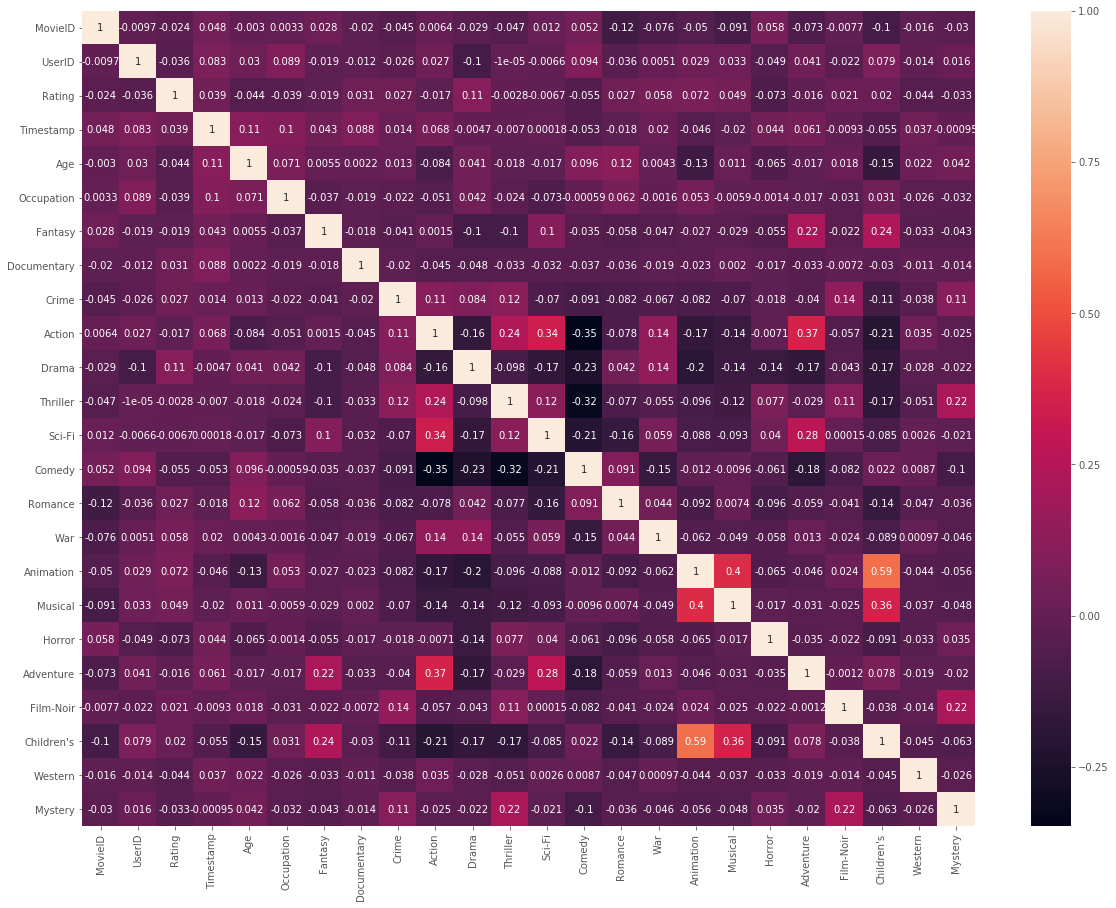

In [41]:
corr = data5k.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [42]:
feature_cols = ['Age','Occupation']

In [43]:
x = data5k[feature_cols]

In [44]:
x.head()

,Age,Occupation
0,1,10
1,1,10
2,1,10
3,1,10
4,1,10


In [45]:
y = data5k['Rating']

In [46]:
display(y.head())

0    5
1    5
2    5
3    4
4    5
Name: Rating, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
linreg = LinearRegression()

In [52]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print(linreg.intercept_)
print(linreg.coef_)

3.7450816452798645
[-0.00341782 -0.00781679]


In [54]:
list(zip(feature_cols,linreg.coef_))

[('Age', -0.003417824770712662), ('Occupation', -0.007816787545888442)]

In [55]:
y_pred = linreg.predict(x_test)

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

1.103140549758952
